In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# **EDA**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

df = pd.read_csv('/content/creditcard_2023.csv')

df.dropna(subset=['Class'], inplace=True)

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Apply Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine into a DataFrame again
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Class'] = y_resampled

# Print class distribution
class_distribution = resampled_df['Class'].value_counts()
print("New Class Distribution:")
print(class_distribution)

resampled_df.to_csv('/content/balanced_dataset_rus.csv', index=False)


New Class Distribution:
Class
0    284315
1    284315
Name: count, dtype: int64


In [ ]:
resampled_df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,9.596694e-18,-1.215581e-16,-8.716997e-17,-1.343537e-16,1.319545e-17,2.159256e-17,-5.798003e-17,1.029645e-17,9.516722e-17,...,1.509480e-17,-9.971565e-18,7.747331e-18,-8.197176e-18,-3.313858e-17,-3.698726e-18,-2.399174e-17,2.289211e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
Numerical_Features = df.select_dtypes(include=['int64', 'float64']).columns
Categorical_Features = df.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


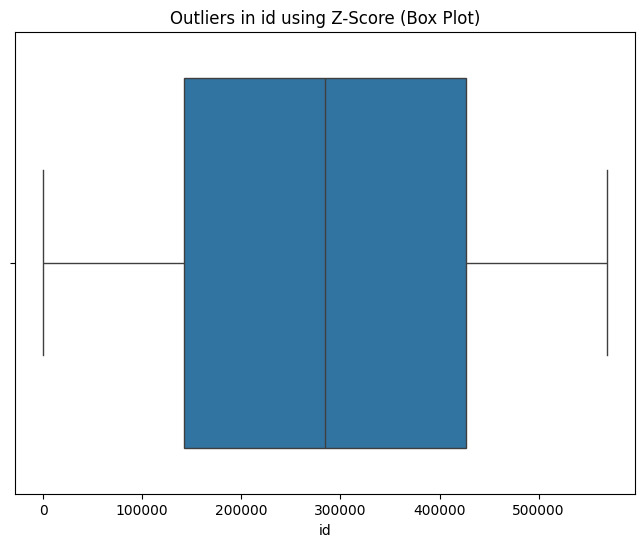

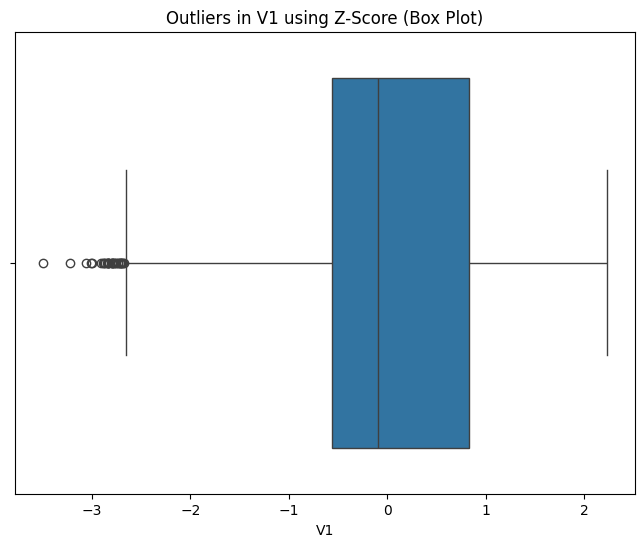

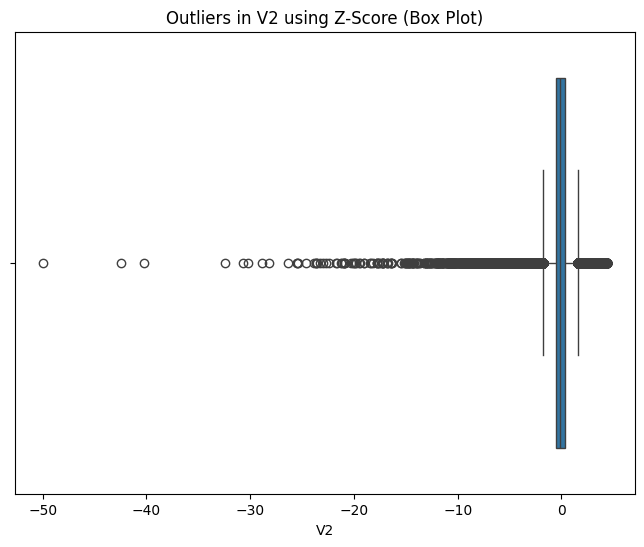

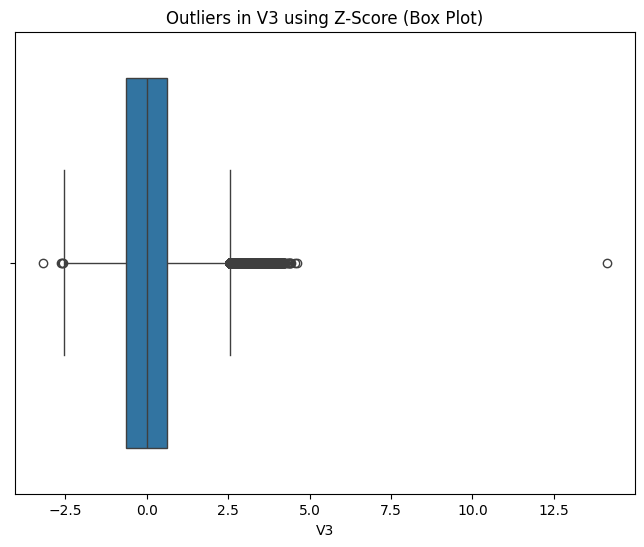

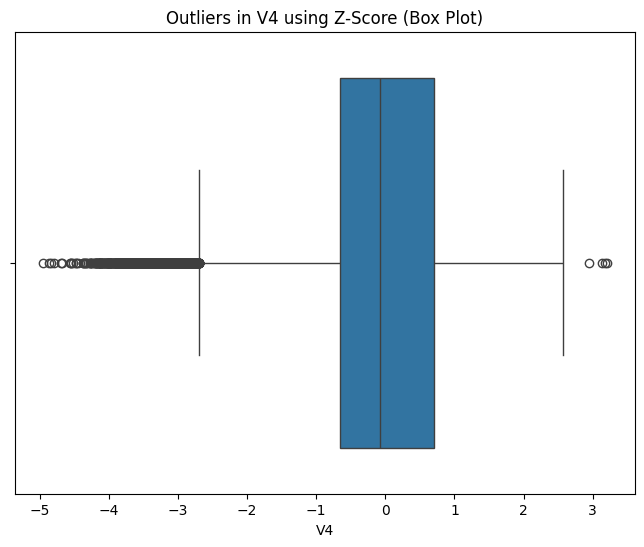

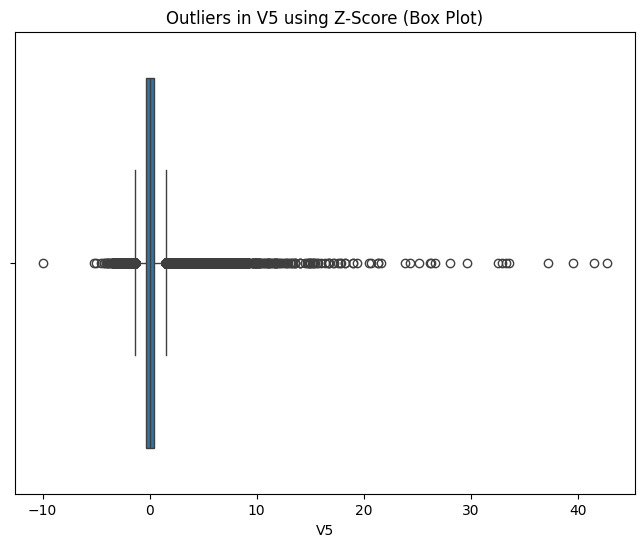

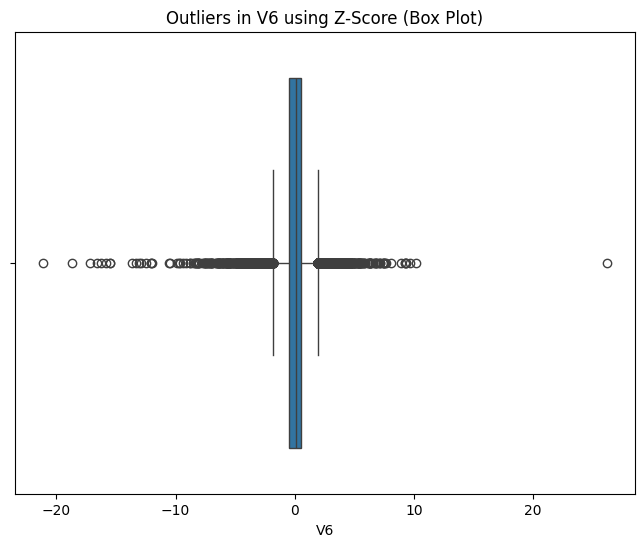

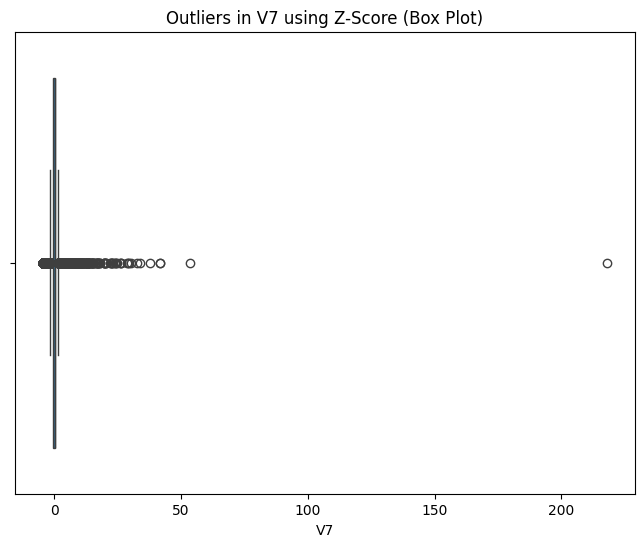

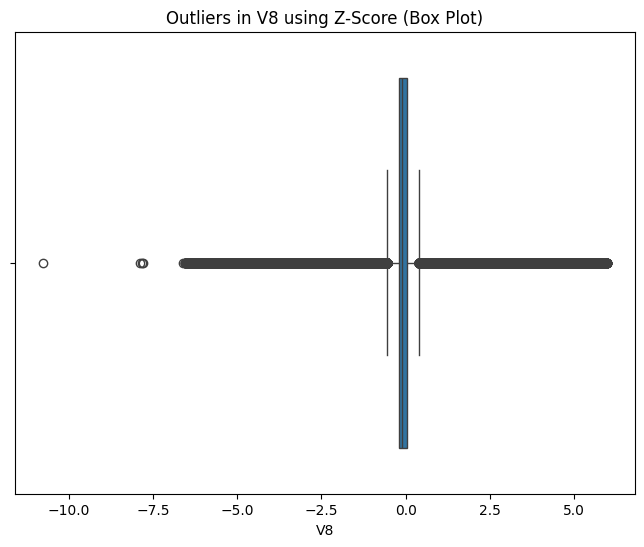

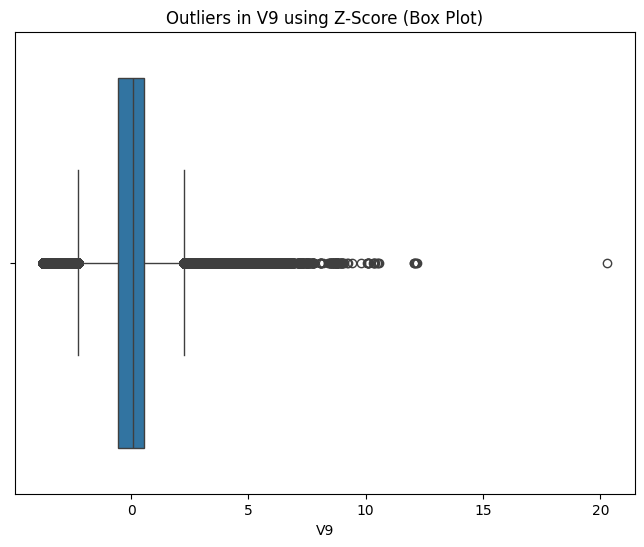

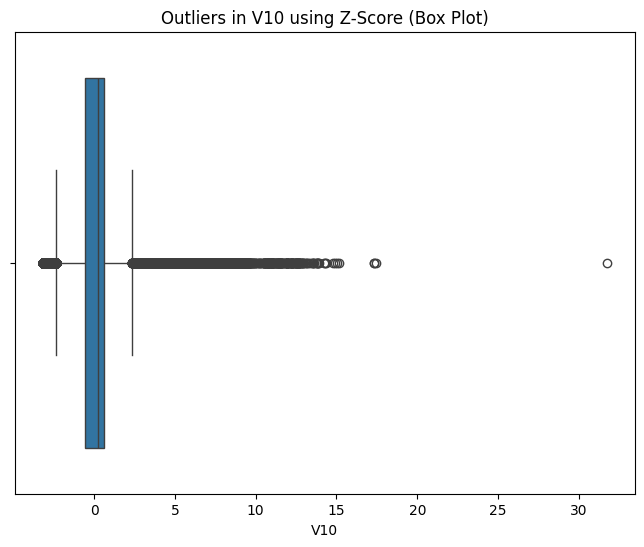

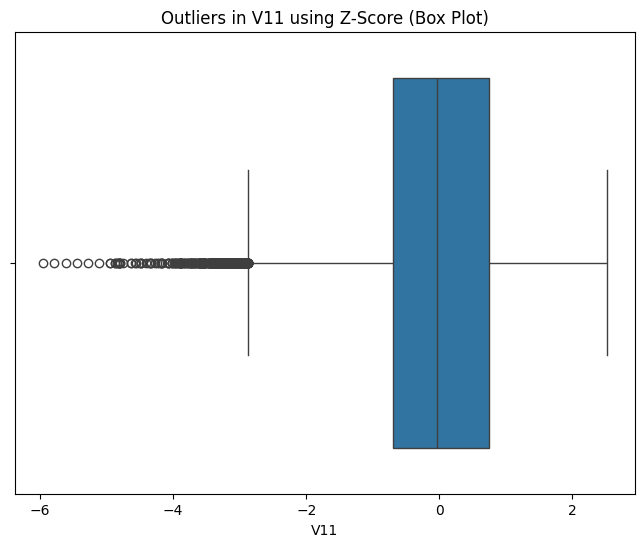

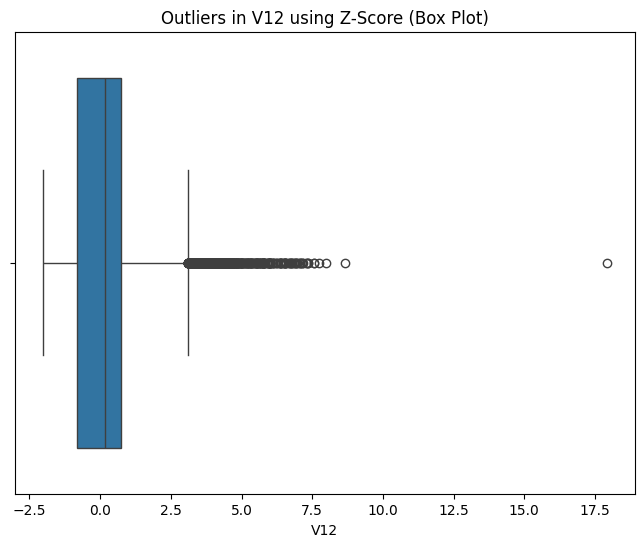

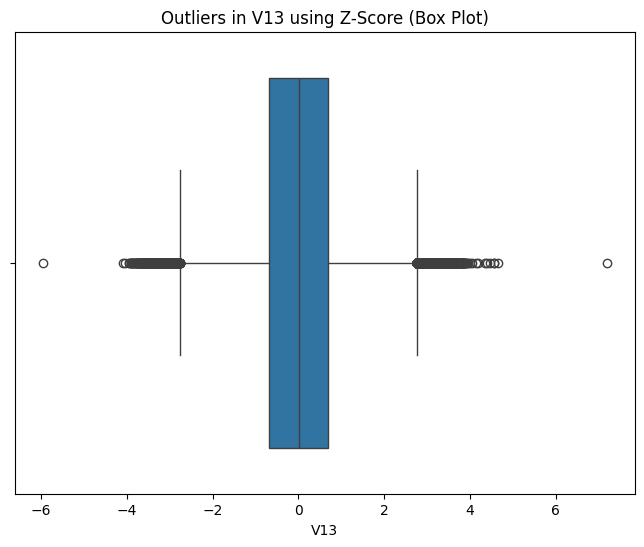

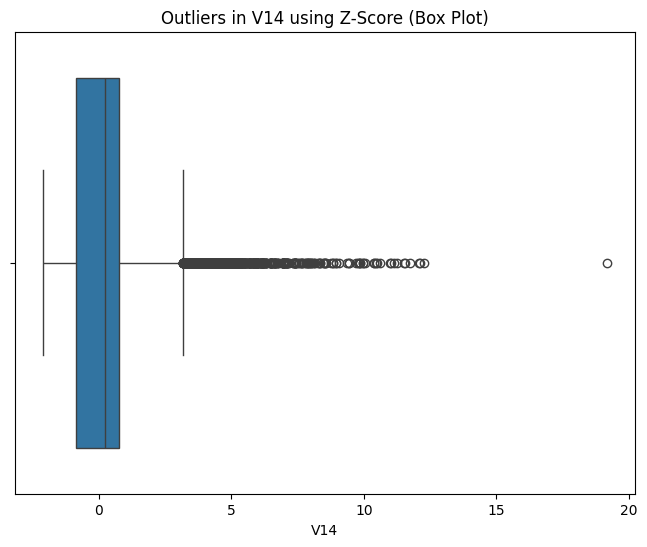

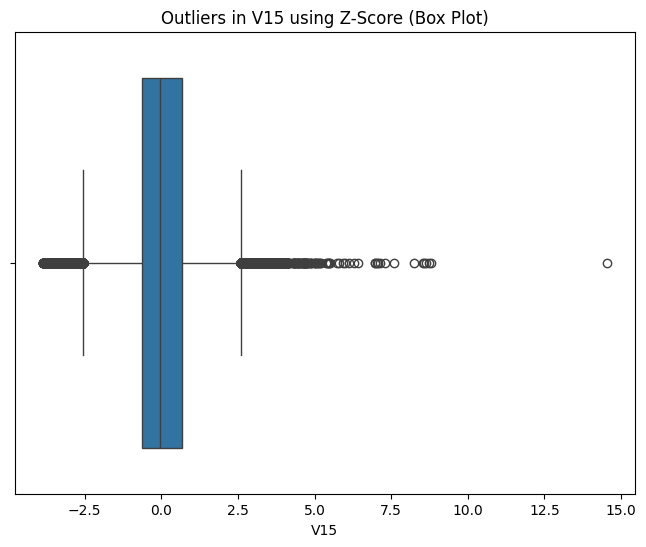

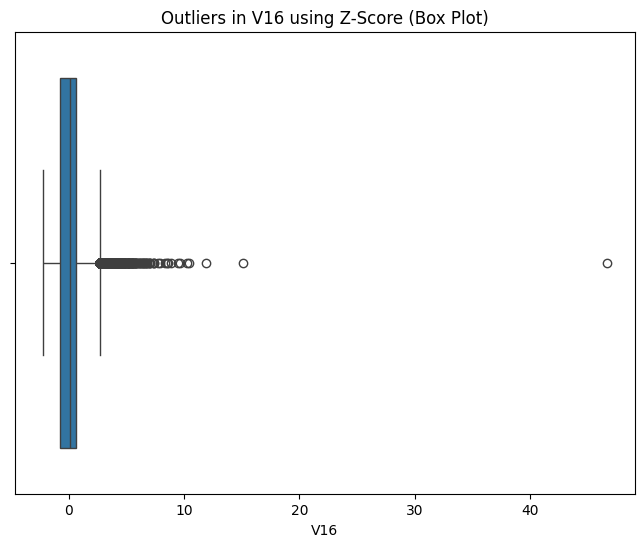

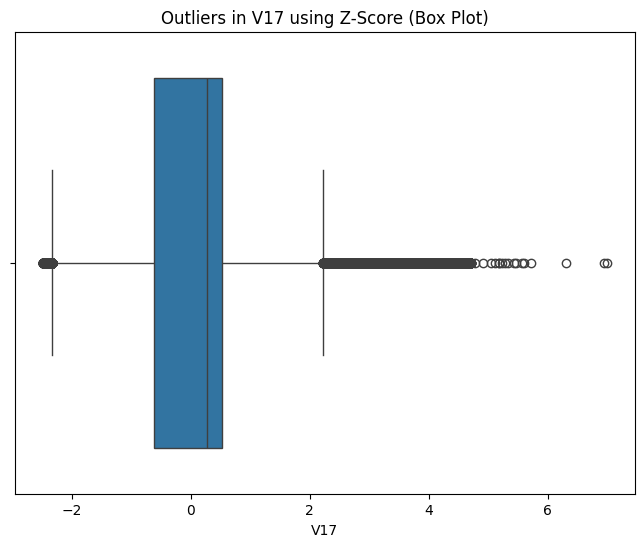

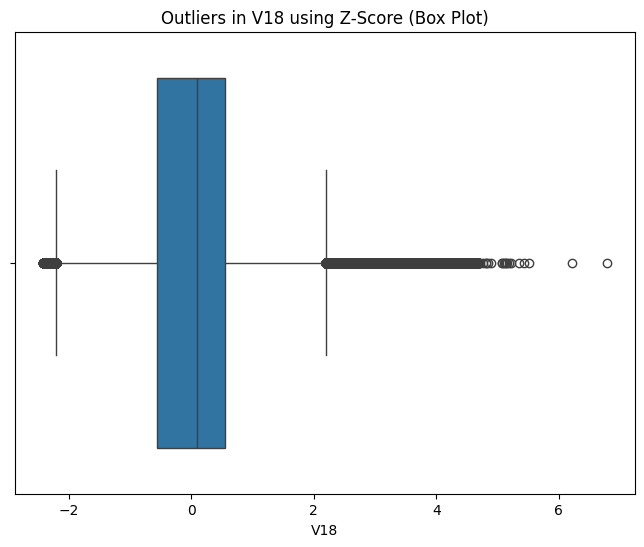

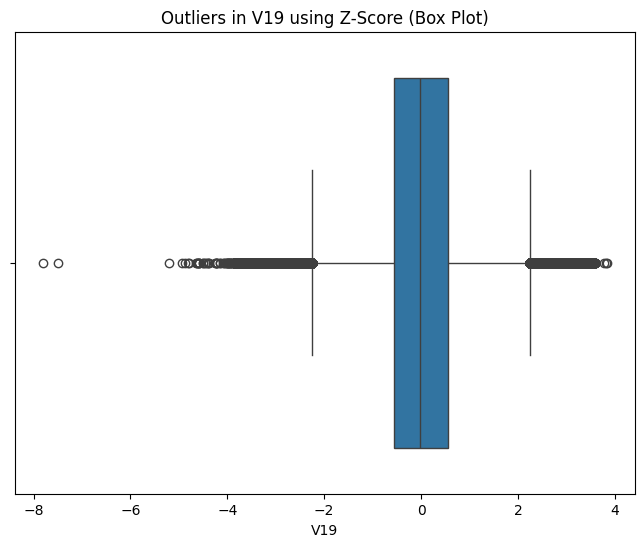

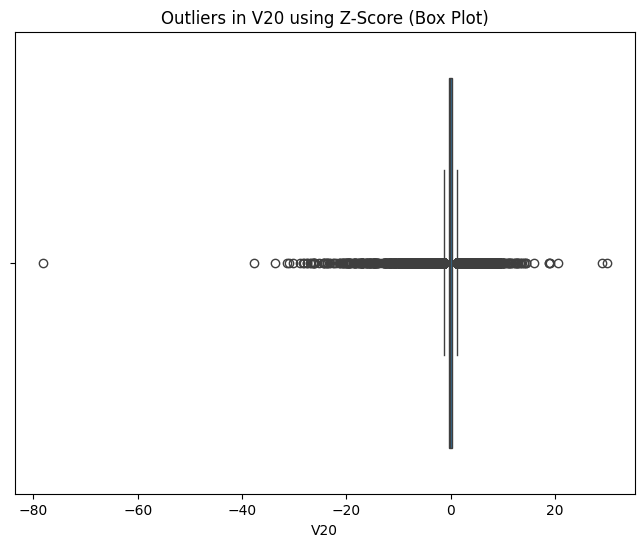

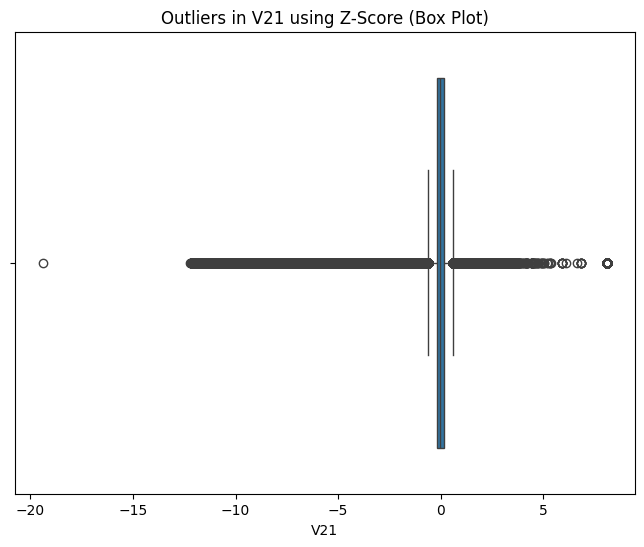

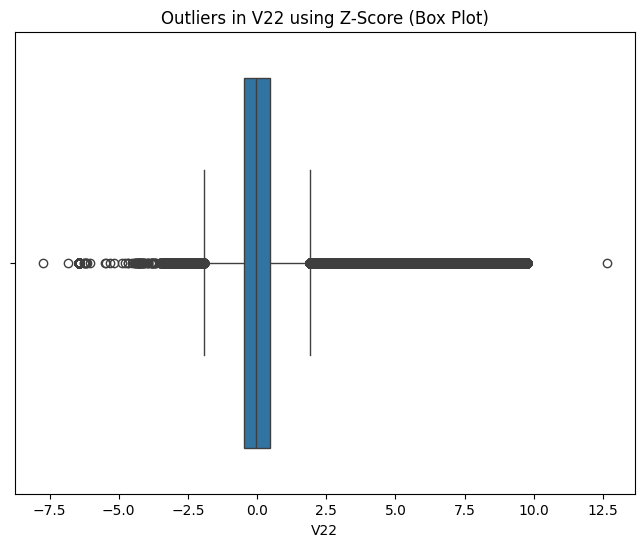

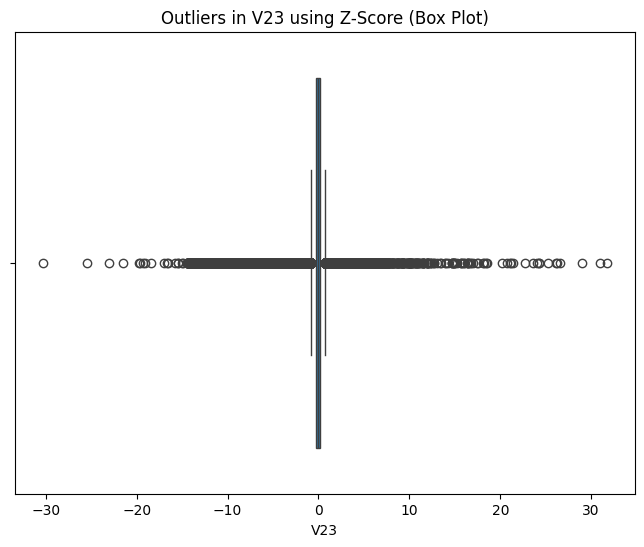

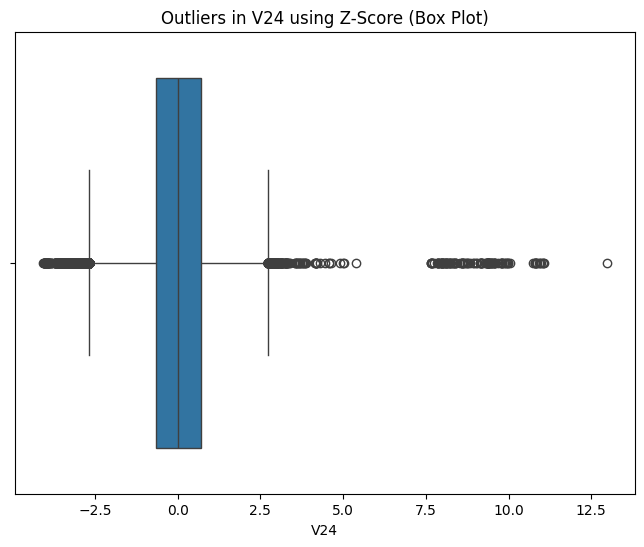

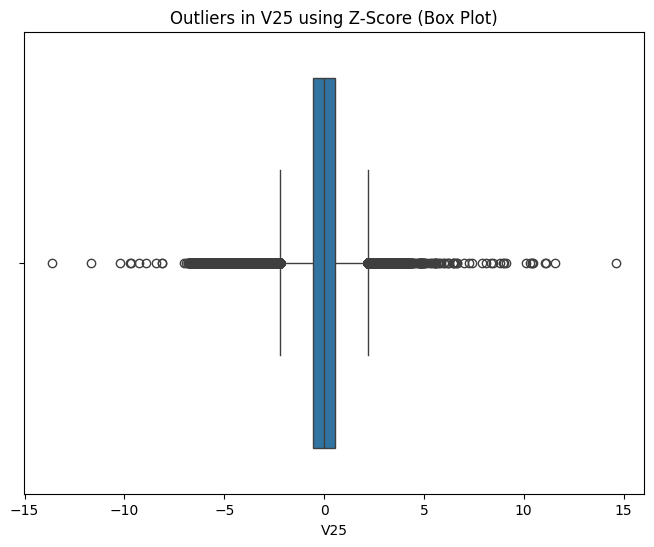

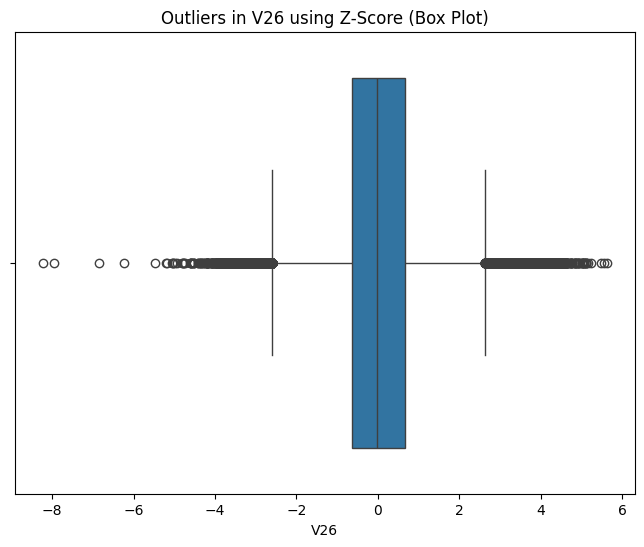

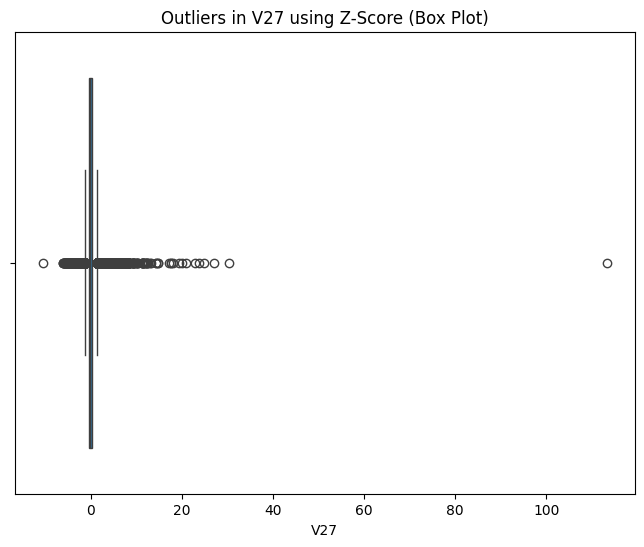

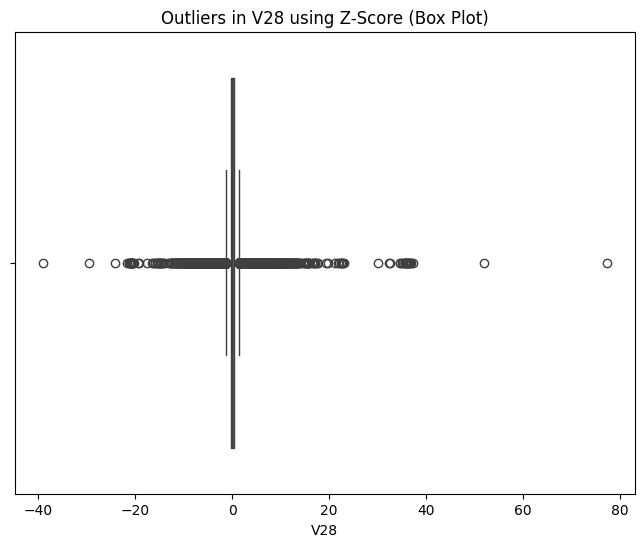

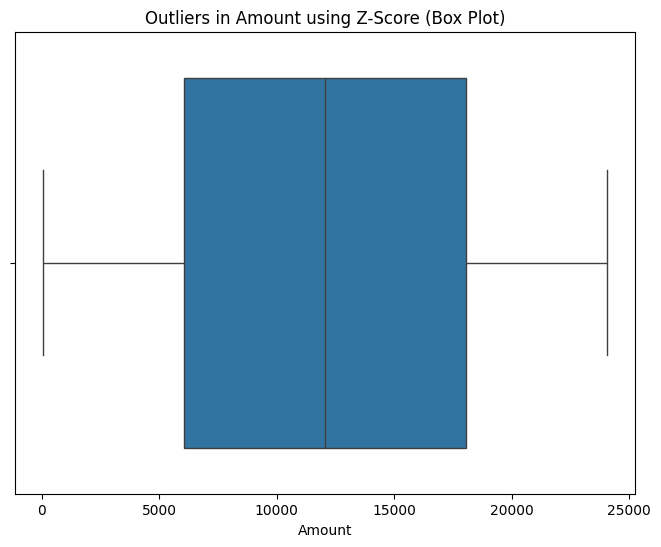

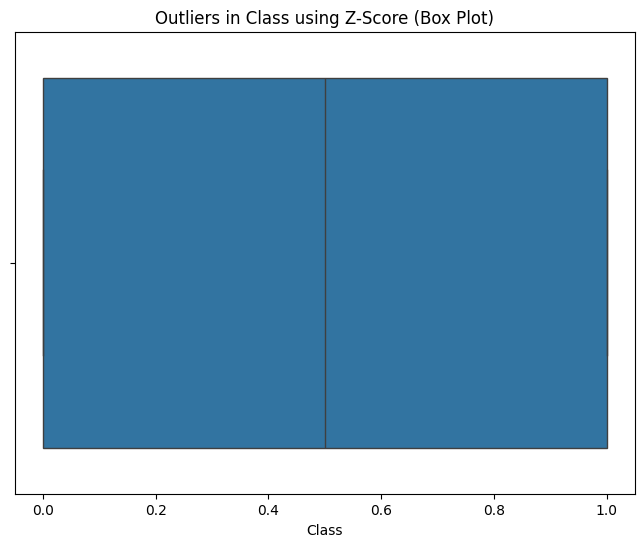

<ipython-input-9-389227ec3d42>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_iqr = resampled_df[(((resampled_df[Numerical_Features]) < (Q1 - 1.5 * IQR)) | (df[Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]


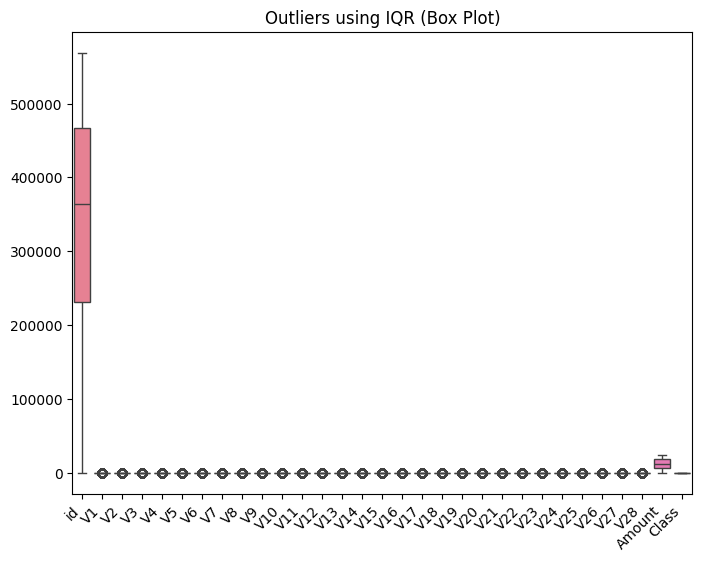

In [ ]:
import numpy as np
for feature in Numerical_Features:
    mean = np.mean(resampled_df[feature])
    std = np.std(resampled_df[feature])
    z_scores = (resampled_df[feature] - mean) / std
    outliers_z = resampled_df[feature][np.abs(z_scores) > 3]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Outliers in {feature} using Z-Score (Box Plot)')
    plt.show()

# IQR method
Q1 = resampled_df[Numerical_Features].quantile(0.25)
Q3 = resampled_df[Numerical_Features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = resampled_df[(((resampled_df[Numerical_Features]) < (Q1 - 1.5 * IQR)) | (df[Numerical_Features] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(8, 6))
sns.boxplot(data=outliers_iqr[Numerical_Features])
plt.title('Outliers using IQR (Box Plot)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
X = resampled_df.drop(columns=['Class'])
y = resampled_df['Class']

X_manual = X.drop(columns=['Amount'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_manual)

X_combined = np.hstack((X_scaled, X[['Amount']].values))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
print("Missing values", resampled_df.isnull().sum())


Missing values id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **feature selection**

# chi square

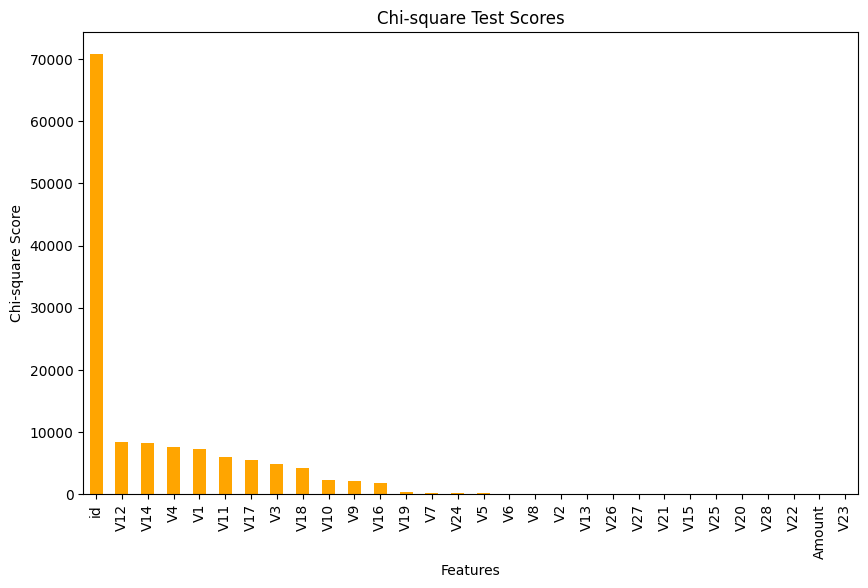

In [ ]:
# Scale features to a non-negative range using MinMaxScaler
from sklearn.feature_selection import chi2 # Import the chi2 function
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using MinMaxScaler
X_scaled = scaler.fit_transform(X)

# Binarize the target variable for classification
y_bin = np.where(y > np.median(y), 1, 0)  # Convert to binary classification

# Compute Chi-square scores
chi2_scores, _ = chi2(X_scaled, y_bin)

# Get feature names from the DataFrame 'X'
feature_names = X.columns # Assign feature_names to the columns of X

chi2_scores = pd.Series(chi2_scores, index=feature_names)
chi2_scores.sort_values(ascending=False, inplace=True)

# Plot Chi-square Scores
plt.figure(figsize=(10, 6))
chi2_scores.plot(kind="bar", color="orange")
plt.title("Chi-square Test Scores")
plt.xlabel("Features")
plt.ylabel("Chi-square Score")
plt.show()

# correlation coffiecient

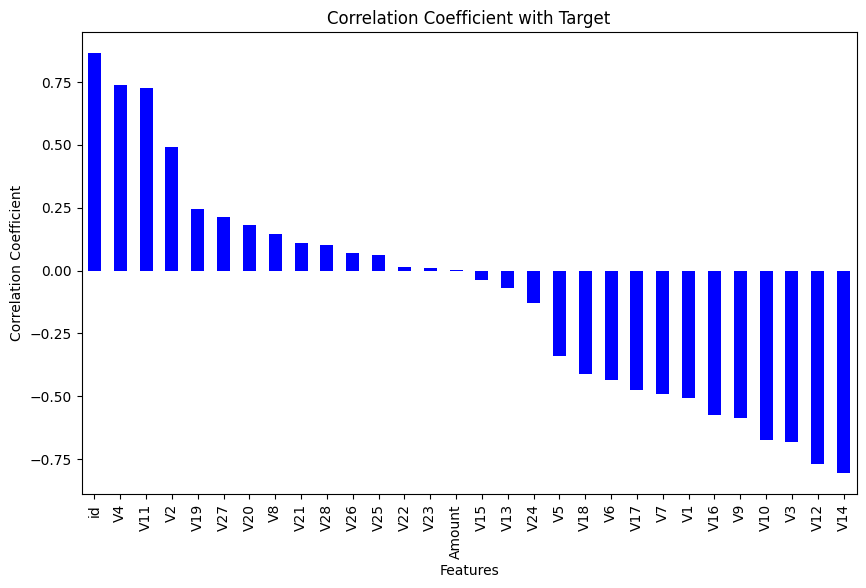

In [ ]:
# Correlation Coefficient
corr_scores = np.corrcoef(X.T, y)[-1, :-1]  # Correlation with target
corr_scores = pd.Series(corr_scores, index=feature_names)
corr_scores.sort_values(ascending=False, inplace=True)

# Plot Correlation Coefficients
plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

# **SVM**

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_small, y_train_small = resample(X_train, y_train, n_samples=5000, random_state=42)

svm_model = SVC(kernel='linear', C=0.25)
svm_model.fit(X_train_small, y_train_small)

y_pred = svm_model.predict(X_test)

In [ ]:
y_pred = svm_model.predict(X_test)

print("SVM Classification:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


SVM Classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56746
           1       1.00      1.00      1.00     56980

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy: 0.9978720785044757


# **PDP**

In [ ]:
X_test.shape

(113726, 30)

/usr/local/lib/python3.11/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


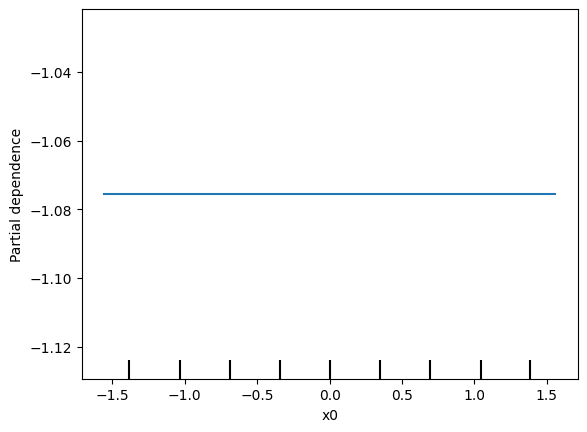

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

feature = [0]
target_class = 0

PartialDependenceDisplay.from_estimator(svm_model, X_test, features=feature, target=target_class)
plt.show()

# **ICE**

/usr/local/lib/python3.11/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


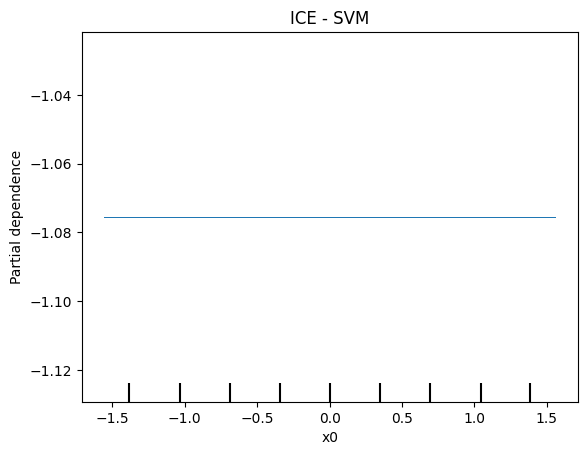

In [ ]:
# ICE is included with PDP in sklearn
PartialDependenceDisplay.from_estimator(svm_model, X_test, features=feature, target=target_class, kind='individual')
plt.title("ICE - SVM")
plt.show()

# **LIME**

In [ ]:
!pip install lime shap scikit-learn numpy pandas matplotlib tensorflow pillow

In [ ]:
svm_model = SVC(kernel='linear', C=0.25, probability=True)  # Enable probability estimation

svm_model.fit(X_train_small, y_train_small)



SVC(C=0.25, kernel='linear', probability=True)

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_small, y_train_small = resample(X_train, y_train, n_samples=5000, random_state=42)



y_pred = svm_model.predict(X_test)
# Get feature names from your DataFrame 'X'
# Assuming 'X' is the DataFrame containing your features
feature_names = X.columns.tolist()

class_names = ['Not Fraud', 'Fraud']


X_train_np = X_train[feature_names].to_numpy()

# Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_np, # Use NumPy array here
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    discretize_continuous=True
)

i = 10
# Convert X_test instance to NumPy array
X_test_instance = X_test.iloc[i].to_numpy()

exp = explainer.explain_instance(
    X_test_instance,  # Use NumPy array here
    svm_model.predict_proba,
    num_features=10
)

exp.show_in_notebook(show_all=False)
print(exp.as_list())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


[('id <= 141807.75', -0.6596875287021158), ('-0.70 < V13 <= 0.02', 0.031827575889741895), ('0.27 < V17 <= 0.52', -0.0316664788572865), ('0.26 < V10 <= 0.59', -0.027314123176839313), ('-0.17 < V27 <= 0.33', -0.021050376568035455), ('-0.04 < V15 <= 0.67', 0.01949303162944299), ('V4 <= -0.66', 0.017201988467803502), ('-0.56 < V19 <= -0.03', 0.014765339861699613), ('V16 > 0.66', -0.01462735602150584), ('-0.09 < V1 <= 0.84', 0.01326775405487811)]


# **SHAP**

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

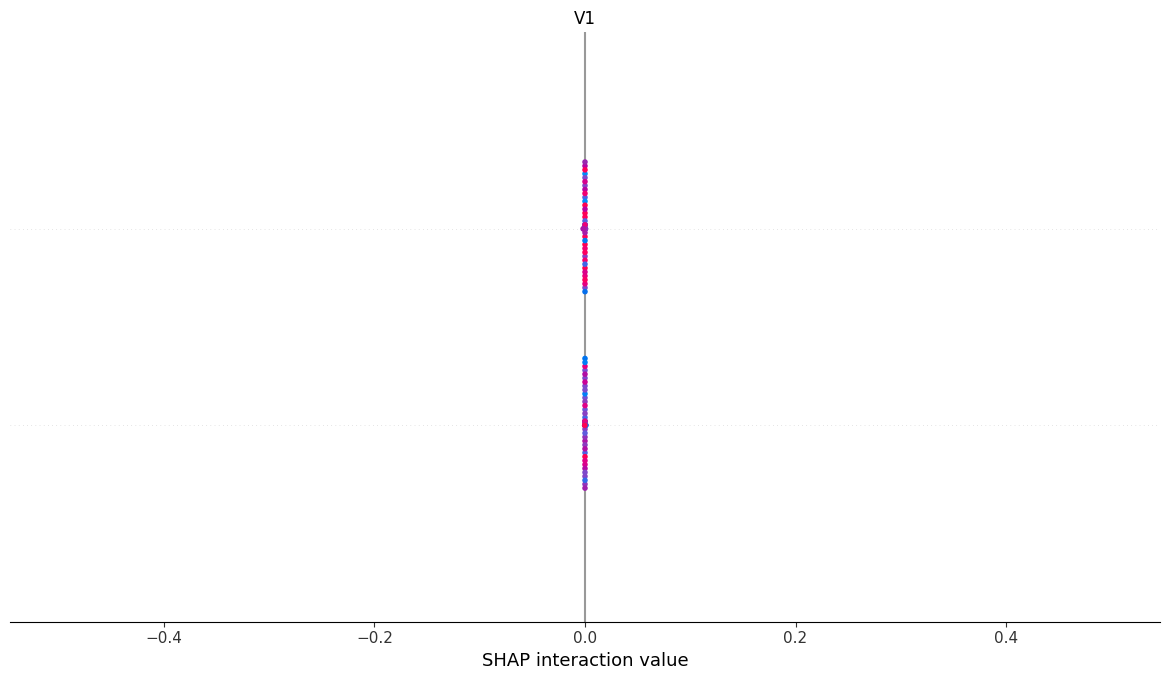

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

explainer = shap.KernelExplainer(svm_model.predict_proba, shap.sample(X_train, 100))

sample_idx = np.random.choice(len(X_test), 50, replace=False)

X_sample = X_test.iloc[sample_idx]

shap_values = explainer.shap_values(X_sample)


shap.summary_plot(shap_values, X_sample, feature_names=X.columns.tolist())